# **Author : Hemant Gosavi**
**GRIP Task No. 1: Prediction using Supervised ML**
**Language used : Python**



#Step 1 : Importing the necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Step 2 : Loading and importing the dataset

In [22]:
datas='http://bit.ly/w-data'
df=pd.read_csv(datas)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Displaying the first 10 rows

In [23]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Step 3 : Input Data Visualisation

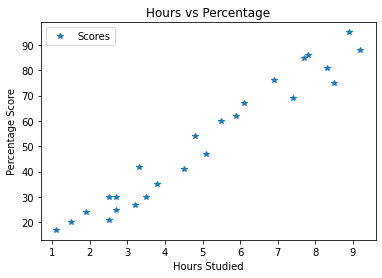

In [99]:
# Data visualization
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#Step 4 : Splitting the Dataset 

In [25]:
hr=df[['Hours']]
scr=df[['Scores']]

#Step 5 : Training the Dataset 

In [76]:
x_train,x_test,y_train,y_test=train_test_split(hr,scr,test_size=0.33,random_state=42)

Making and viewing a train dataset

In [78]:
train_ds = pd.DataFrame({'X_Train (Hours)':x_train.values.flatten(),'Y_Train (Score)':y_train.values.flatten()},index = np.arange(0,16,1))
train_ds

,X_Train (Hours),Y_Train (Score)
0,1.5,20
1,3.2,27
2,4.5,41
3,8.9,95
4,8.5,75
5,3.5,30
6,2.7,30
7,1.9,24
8,4.8,54
9,6.1,67


Making and viewing a test dataset

In [80]:
test_ds = pd.DataFrame({'X_Test (Hours)':x_test.values.flatten(),'Y_test (Score)':y_test.values.flatten()},index = np.arange(0,9,1))
test_ds

,X_Test (Hours),Y_test (Score)
0,8.3,81
1,2.5,30
2,2.5,21
3,6.9,76
4,5.9,62
5,2.7,25
6,3.3,42
7,5.1,47
8,3.8,35


Visualising the Dataset

#Step 6 : Building the Model
Creating a Linear regression model using scikit learn library and training the model using train data

In [83]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

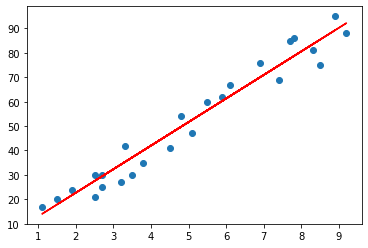

In [84]:
# Plotting the regression line
line = lr.coef_*hr+lr.intercept_

# Plotting for the test data
plt.scatter(hr, scr)
plt.plot(hr, line,color='red');
plt.show()

Executing the trained model on x_test data i.e. Hours and viewing the predicted scores


In [85]:
y_pred=lr.predict(x_test)
y_pred

array([[83.50244409],
       [27.53075726],
       [27.53075726],
       [69.99203692],
       [60.34174609],
       [29.46081542],
       [35.25098992],
       [52.62151342],
       [40.07613534]])

Tabular Comparison of Actual score with the predicted scores for a common Hours of study


In [86]:
comp = pd.DataFrame({'Hours of study':x_test.values.flatten(),'Actual Scores':y_test.values.flatten(),'Predicted Scores)':y_pred.flatten()},index=np.arange(0,9,1))
comp

,Hours of study,Actual Scores,Predicted Scores)
0,8.3,81,83.502444
1,2.5,30,27.530757
2,2.5,21,27.530757
3,6.9,76,69.992037
4,5.9,62,60.341746
5,2.7,25,29.460815
6,3.3,42,35.250990
7,5.1,47,52.621513
8,3.8,35,40.076135


Visual Comparison of Actual score with the predicted scores for a common Hours of study

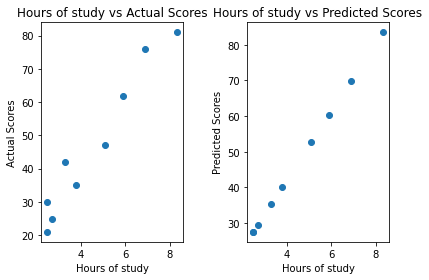

In [87]:
plt.subplot(1,2,1)
plt.scatter(x_test,y_test)
plt.xlabel('Hours of study')
plt.ylabel('Actual Scores')
plt.title('Hours of study vs Actual Scores')


plt.subplot(1,2,2)
plt.scatter(x_test,y_pred)
plt.xlabel('Hours of study')
plt.ylabel('Predicted Scores')
plt.title('Hours of study vs Predicted Scores')
plt.tight_layout()



#Step 6 : Plotting the line of Regression
Viewing Linear regression plot Hours of Study (x_test) v/s Predicted Score (y_predict)

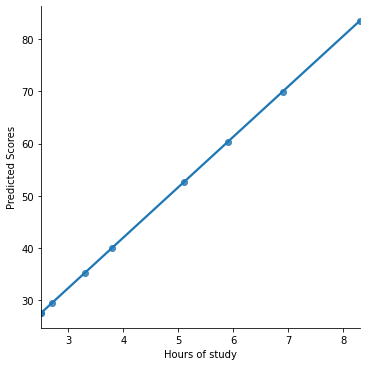

In [89]:
conv_arr= x_test.values
data1 = pd.DataFrame({'Hours of study':x_test.values.flatten(),'Predicted Scores':y_pred.flatten()},index = np.arange(0,9,1))
sns.lmplot(x='Hours of study',y='Predicted Scores',data=data1)



#Step 7 : Making Predictions

In [93]:
print(x_test)
y_pred = lr.predict(x_test)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1
22    3.8


Predicting score for 10 hours of study per day

In [96]:
print(lr.predict([[9.25]]))

[[92.67022038]]


#Step 8 : Evaluating the Model

In [98]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.564015037730867
